In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

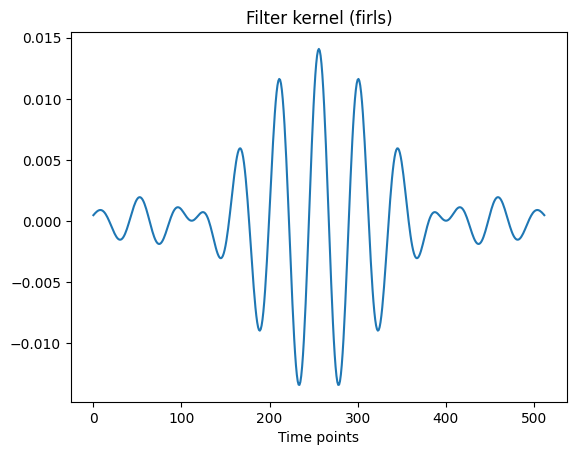

In [2]:
srate   = 1024
nyquist = srate/2
frange  = [20,25]
transw  = .1
order   = int( 10*srate/frange[0] )

if order%2==0:
    order += 1

shape = [ 0, 0, 1, 1, 0, 0 ]
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ]

filtkern = scipy.signal.firls(order,frex,shape,fs=srate)

plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')
plt.show()

In [3]:
filtpow = np.abs(scipy.fftpack.fft(filtkern))**2
hz      = np.linspace(0,srate/2,int(np.floor(len(filtpow)/2)+1))
filtpow = filtpow[0:len(hz)]

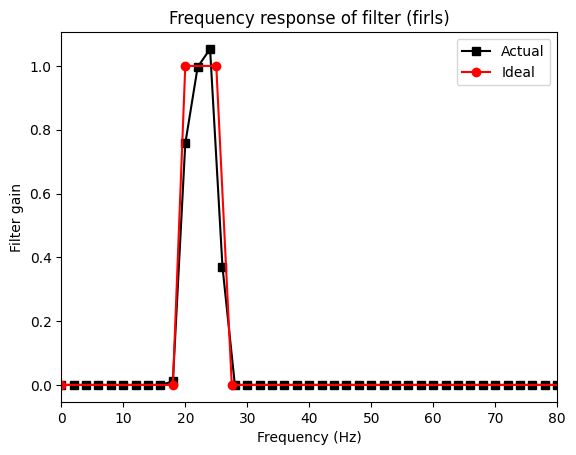

In [4]:
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot(frex,shape,'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')

plt.show()

In [5]:
signal = np.random.randn(srate*4)
filtsig = scipy.signal.filtfilt(filtkern, 1, signal)

tmpsignal = scipy.signal.lfilter(filtkern, 1, signal)
tmpsignal = scipy.signal.lfilter(filtkern, 1, tmpsignal[::-1])
filtsig1 = tmpsignal[::-1]

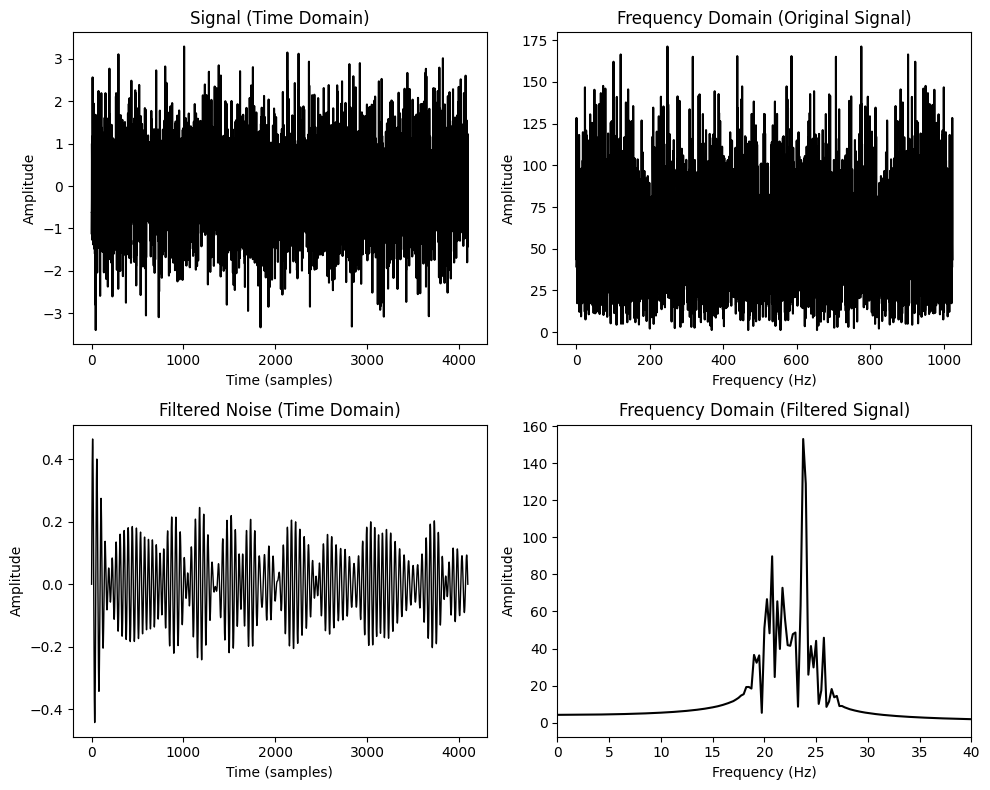

In [6]:
plt.figure(figsize=(10, 8))  

plt.subplot(2, 2, 1)
plt.plot(signal, "k")
plt.title("Signal (Time Domain)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

hz = np.linspace(0, srate, len(signal))  
plt.subplot(2, 2, 2)
plt.plot(hz, abs(scipy.fft.fft(signal)), "k")
plt.title("Frequency Domain (Original Signal)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 3)
plt.plot(filtsig, "k", linewidth=1)
plt.title("Filtered Noise (Time Domain)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 4)
plt.plot(hz, abs(scipy.fft.fft(filtsig)), "k")
plt.xlim([0, frange[0] * 2])
plt.title("Frequency Domain (Filtered Signal)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.tight_layout() 
plt.show()


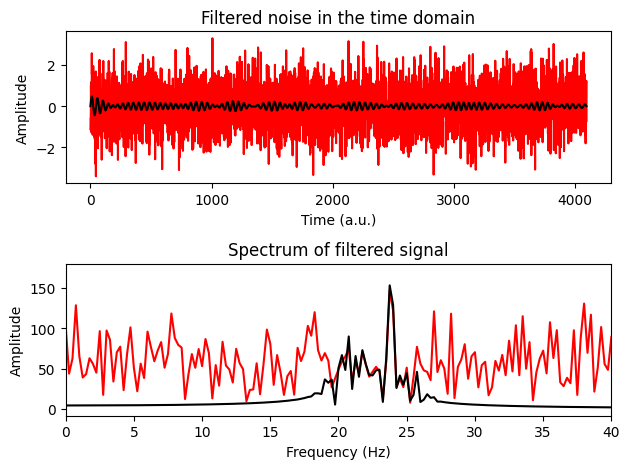

In [7]:
plt.subplot(211)
plt.plot(signal, "r")
plt.plot(filtsig, "k")
plt.title("Filtered noise in the time domain")
plt.ylabel("Amplitude")
plt.xlabel("Time (a.u.)")

plt.subplot(212)
plt.plot(hz, abs(scipy.fft.fft(signal)), "r")
plt.plot(hz, abs(scipy.fft.fft(filtsig)), "k")
plt.xlim([0, frange[0]*2])
plt.title("Spectrum of filtered signal")
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")

plt.tight_layout()


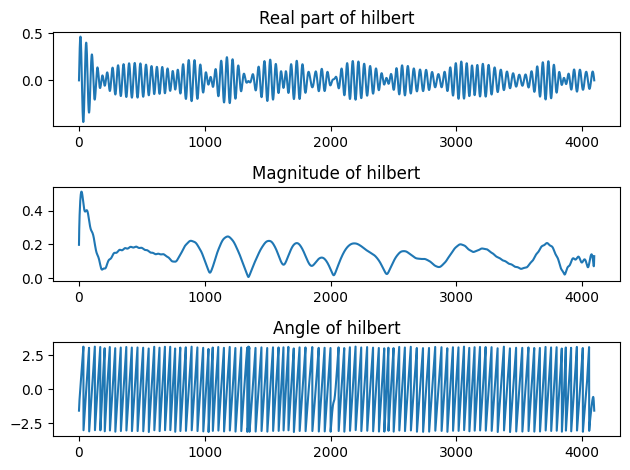

In [8]:
hiltFiltSig = scipy.signal.hilbert(filtsig)

plt.subplot(311)
plt.plot(np.real(hiltFiltSig))
plt.title("Real part of hilbert")

plt.subplot(312)
plt.plot(abs(hiltFiltSig))
plt.title("Magnitude of hilbert")

plt.subplot(313)
plt.plot(np.angle(hiltFiltSig))
plt.title("Angle of hilbert")

plt.tight_layout()